In [1]:
# Hand-witten Digit Recognition
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
digits['feature_names'][0]

'pixel_0_0'

In [7]:
digits['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
digits['target'][0]

0

In [9]:
digits['target_names'][0]

0

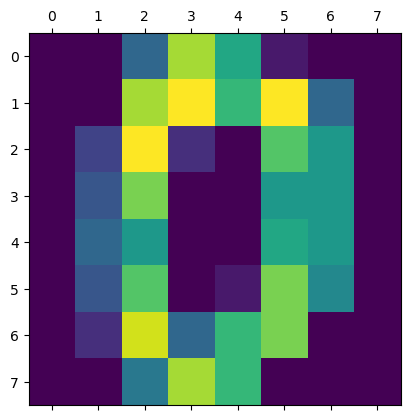

In [10]:
import matplotlib.pyplot as plt
plt.matshow(digits['images'][0])

<Figure size 640x480 with 0 Axes>

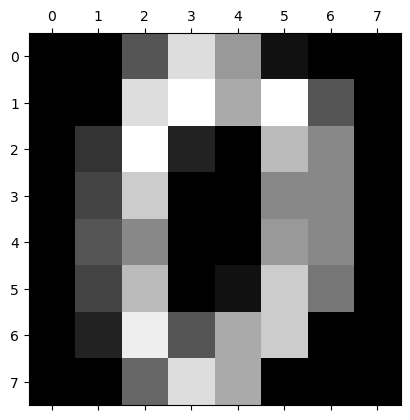

In [11]:
plt.gray()
plt.matshow(digits['images'][0])

<Figure size 640x480 with 0 Axes>

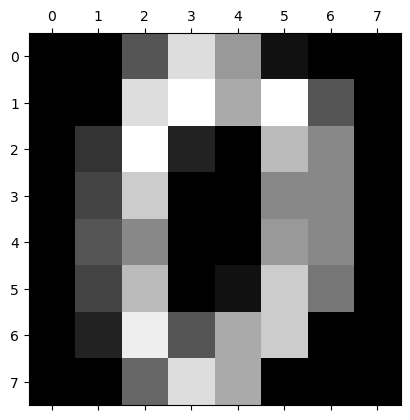

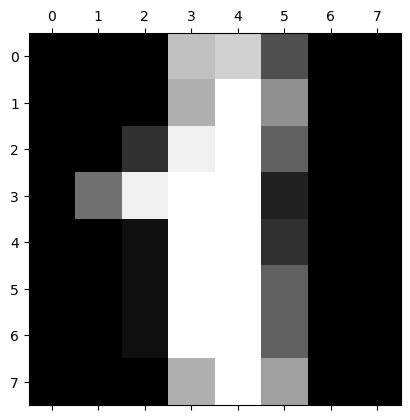

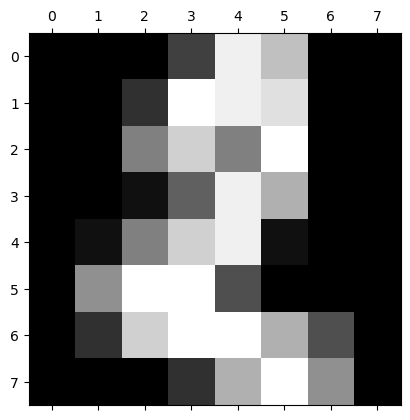

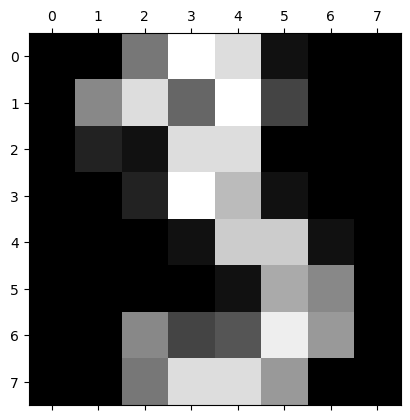

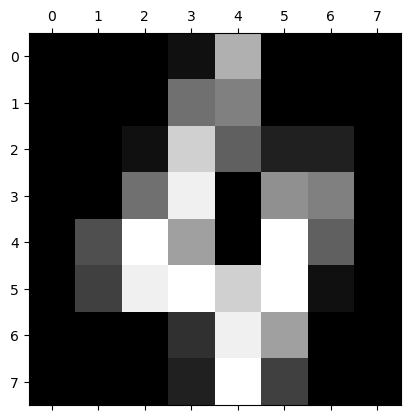

In [12]:
for i in range(5):
    plt.gray()
    plt.matshow(digits['images'][i])

In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits['data'], digits['target'], test_size=0.2)

In [14]:
Xtrain

array([[ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  0.,  3., ..., 14.,  0.,  0.],
       [ 0.,  0.,  2., ...,  7.,  0.,  0.],
       ...,
       [ 0.,  0.,  3., ...,  0.,  0.,  0.],
       [ 0.,  0.,  7., ..., 11.,  3.,  0.],
       [ 0.,  0.,  7., ...,  0.,  0.,  0.]])

In [15]:
Xtrain.shape

(1437, 64)

In [16]:
Xtest.shape

(360, 64)

In [17]:
digits['data'].shape

(1797, 64)

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=3000)

model.fit(Xtrain, ytrain)

LogisticRegression(max_iter=3000)

In [19]:
model.score(Xtest, ytest)

0.95

In [20]:
ypredicted = model.predict(Xtest)

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, ypredicted)
cm

array([[34,  0,  0,  0,  1,  1,  2,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  1, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 31,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 32,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  1, 29,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  1, 26]], dtype=int64)

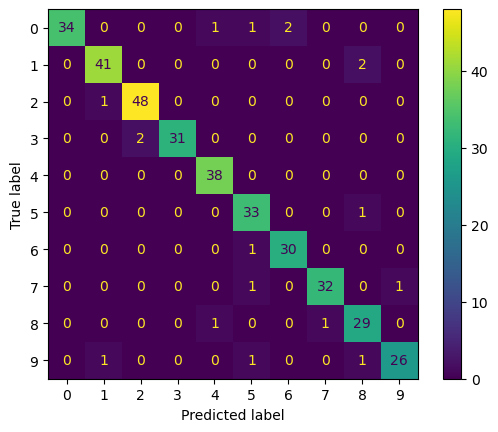

In [22]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

cm_display.plot()
plt.show()

# Exercise

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

    1. Sepal Length
    2. Sepal Width
    3. Petal Length
    4. Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

    1. Setosa
    2. Versicolour
    3. Virginica

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()

In [24]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [25]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [26]:
iris['data'][0]
# Sepal Length, Sepal Width, Petal Length, Petal Width

array([5.1, 3.5, 1.4, 0.2])

In [36]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [40]:
iris['filename']

'iris.csv'

In [42]:
Xtrain, Xtest, ytrain, ytest = train_test_split(iris['data'], iris['target'])

In [44]:
Xtrain.shape

(112, 4)

In [45]:
Xtest.shape

(38, 4)

In [46]:
iris['data'].shape

(150, 4)

In [55]:
model = LogisticRegression(max_iter=1000)
model.fit(Xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [56]:
model.score(Xtest, ytest)

0.9473684210526315

In [57]:
ypredicted = model.predict(Xtest)

In [58]:
cm = confusion_matrix(ytest, ypredicted)
cm

array([[10,  0,  0],
       [ 0, 13,  1],
       [ 0,  1, 13]], dtype=int64)

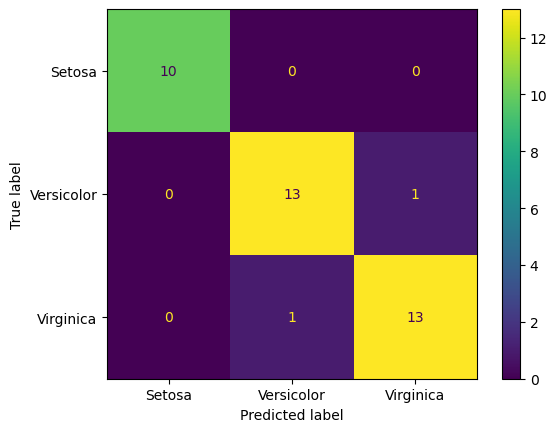

In [59]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Setosa', 'Versicolor', 'Virginica'])

cm_display.plot()
plt.show()